# CNN

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 55s 70ms/step - loss: 0.2094 - accuracy: 0.9352 - val_loss: 0.0683 - val_accuracy: 0.9805
Epoch 2/10
750/750 [==============================] - 54s 71ms/step - loss: 0.0536 - accuracy: 0.9826 - val_loss: 0.0502 - val_accuracy: 0.9857
Epoch 3/10
750/750 [==============================] - 53s 71ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 4/10
750/750 [==============================] - 53s 70ms/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0508 - val_accuracy: 0.9851
Epoch 5/10
750/750 [==============================] - 53s 71ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 6/10
750/750 [==============================] - 54s 73ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0374 - val_accuracy: 0.9895
Epoch 7/10
750/750 [==============================] - 53s 70ms/step - l

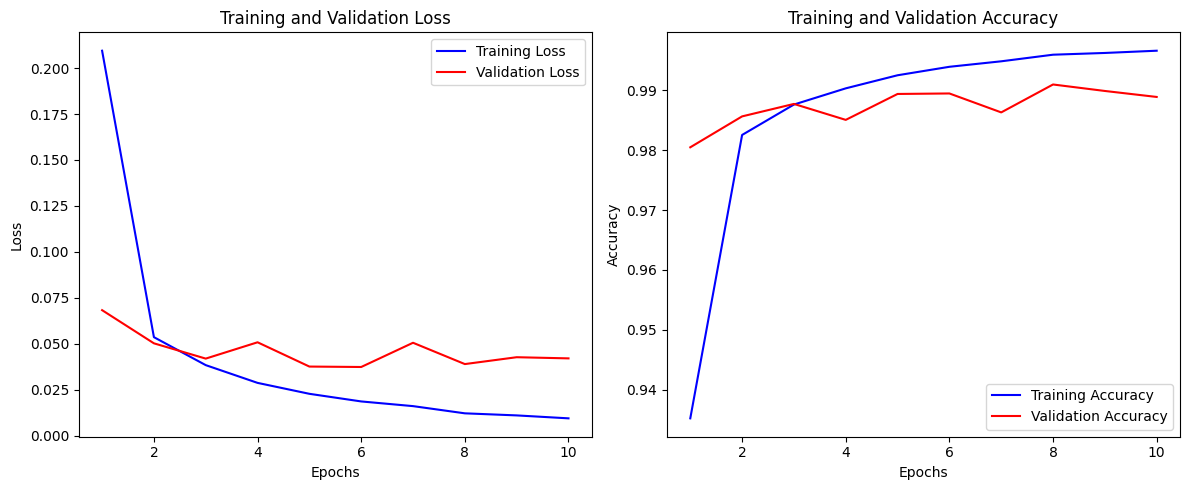

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 載入MNIST數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 建立CNN模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# 繪製LOSS和ACCURACY曲線
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# DNN

Epoch 1/10
750/750 [==============================] - 13s 15ms/step - loss: 0.5344 - accuracy: 0.8331 - val_loss: 0.1531 - val_accuracy: 0.9555
Epoch 2/10
750/750 [==============================] - 14s 18ms/step - loss: 0.2382 - accuracy: 0.9348 - val_loss: 0.1272 - val_accuracy: 0.9651
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1956 - accuracy: 0.9461 - val_loss: 0.1083 - val_accuracy: 0.9707
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1633 - accuracy: 0.9550 - val_loss: 0.0991 - val_accuracy: 0.9724
Epoch 5/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1450 - accuracy: 0.9588 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 6/10
750/750 [==============================] - 11s 14ms/step - loss: 0.1329 - accuracy: 0.9628 - val_loss: 0.1028 - val_accuracy: 0.9713
Epoch 7/10
750/750 [==============================] - 11s 14ms/step - loss: 0.1253 - accuracy: 0.9643 - val_loss: 0.0866 - val_accuracy:

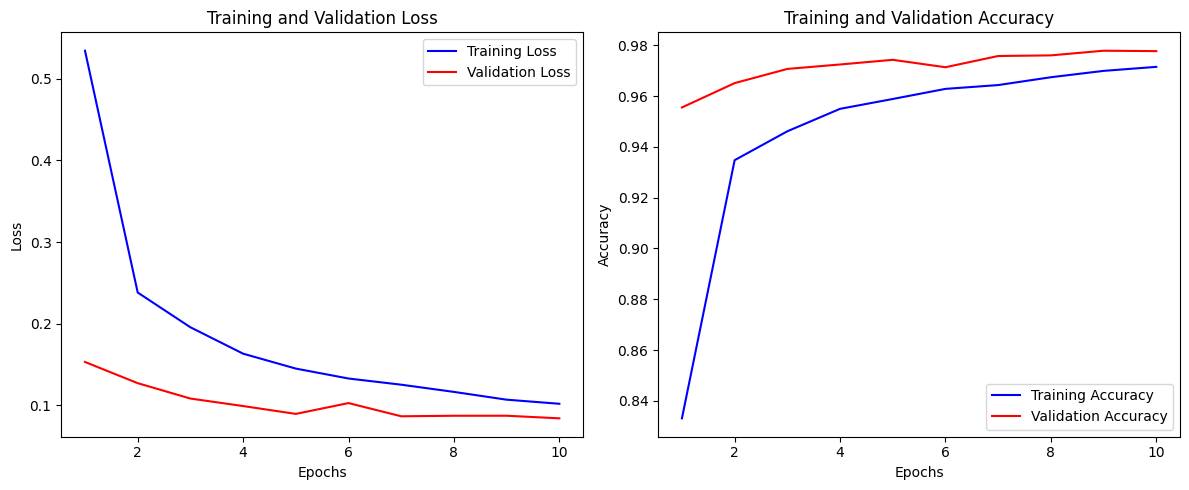

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 載入MNIST數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 建立DNN模型
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# 繪製LOSS和ACCURACY曲線
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()